In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

In [174]:
df = pd.read_csv("dataset.csv")
df.head()

,song_id,keyword_1,keyword_2,keyword_3,genre
0,74,guitar,happy,distorted,rock
1,103,brass,energetic,melodic,classical
2,201,banjo,happy,acoustic,country
3,194,synth,energetic,heavy,hip-hop
4,184,synth,energetic,slow,hip-hop


## Generating word embeddings for the keywords using BoW

In [175]:
def create_embeddings(keyword):
    # arr = np.zeros(26)
    # for i in keyword:
    #     arr[ord(i.upper()) - ord('A')] += 1

    # return arr
    return np.array([3.0,4.0,5.0,6.0])

In [176]:
def give_df_keyword_embeddings(df):
    arr = []
    for idx, row in df.iterrows():
        t = []
        t.append(create_embeddings(row['keyword_1']))
        t.append(create_embeddings(row['keyword_2']))
        t.append(create_embeddings(row['keyword_3']))
        arr.append(t)

    return np.array(arr)

In [177]:
embeddings = give_df_keyword_embeddings(df)
embeddings

array([[[3., 4., 5., 6.],
        [3., 4., 5., 6.],
        [3., 4., 5., 6.]],

       [[3., 4., 5., 6.],
        [3., 4., 5., 6.],
        [3., 4., 5., 6.]],

       [[3., 4., 5., 6.],
        [3., 4., 5., 6.],
        [3., 4., 5., 6.]],

       ...,

       [[3., 4., 5., 6.],
        [3., 4., 5., 6.],
        [3., 4., 5., 6.]],

       [[3., 4., 5., 6.],
        [3., 4., 5., 6.],
        [3., 4., 5., 6.]],

       [[3., 4., 5., 6.],
        [3., 4., 5., 6.],
        [3., 4., 5., 6.]]])

## Dimensionality Reduction for each keyword matrix

In [178]:
# reducing features to useful features only
class PCA:
    def __init__(self, n):
        self.n = n
        self.mean = None
        self.components = None
        
    def fit(self, vec):
        self.mean = np.mean(vec, axis = 0)
        vec -= self.mean

        cov = np.cov(vec.T)

        eigenvectors, eigenvalues = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T

        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n]
        
        

    def transform(self, vec):
        vec -= self.mean
        return np.dot(vec, self.components.T)

In [179]:
def transform_embeddings(embeddings, PCA):

    arr = []
    for i, row in enumerate(embeddings):
        pca = PCA(2)
        pca.fit(row)
        reduced_dim_row = pca.transform(row)
        arr.append(reduced_dim_row)
    
    return np.array(arr)

transformed_embeddings = transform_embeddings(embeddings, PCA)
transformed_embeddings

array([[[ 0.,  0.],
        [ 0.,  0.],
        [-0., -0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [-0., -0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [-0., -0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [-0., -0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [-0., -0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [-0., -0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [-0., -0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [-0., -0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [-0., -0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [-0., -0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [-0., -0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [-0., -0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [-0., -0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [-0., -0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [-0., -0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [-0., -0.]],

       [

## Combining the embeddings into one

In [180]:
def combine_embeddings(transformed_embeddings):
    arr = []

    for i, row in enumerate(transformed_embeddings):
        t = [0, 0]
        for j, vals in enumerate(row):
            t[0] += vals[0]
            t[1] += vals[1]
        t[0] /= len(row)
        t[1] /= len(row)
        
        arr.append(t)

    return np.array(arr)

combined_embeddings = combine_embeddings(transformed_embeddings)
combined_embeddings

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

## Apply K-Means clustering

In [181]:
def get_squared_dis(x1, y1, x2, y2):
    return (x1 - x2)**2 + (y1 - y2)**2

In [182]:
def compute_init_centroids(K, matrix):
    random_idx = np.random.permutation(matrix.shape[0])
    
    centroids = matrix[random_idx[:K]]
    
    return centroids
    

In [183]:
def get_cluster_index(centroids, matrix, K):
    m ,n = matrix.shape
    cluster_index = np.zeros(m)

    for i in range(m):

        d = get_squared_dis(matrix[i][0], matrix[i][1], centroids[0][0], centroids[0][1])
        ans = 0
        for j in range(1, K):
            new_d = get_squared_dis(matrix[i][0], matrix[i][1], centroids[j][0], centroids[j][1])
            if(new_d < d):
                d = new_d
                ans = j

        cluster_index[i] = ans

    return cluster_index
                
            

In [184]:
def compute_centroids(cluster_index, matrix, centroids, k):
    m, n = matrix.shape
    new_centroids = []

    for i in range(k):

        x_m, y_m = 0, 0
        n = 0
        for j in range(m):
            if cluster_index[j] == i:
                x_m += matrix[j][0]
                y_m += matrix[j][1]
                n += 1

        if n != 0:
            x_m /= n
            y_m /= n

        new_centroids.append([x_m ,y_m])

    return np.array(new_centroids)

In [185]:
def run_KMeans(matrix, K, iterations):
    m, n = matrix.shape
    centroids = compute_init_centroids(K, matrix)

    for i in range(iterations):

        cluster_index = get_cluster_index(centroids, matrix, K)

        centroids = compute_centroids(cluster_index, matrix, centroids, K)

    return cluster_index, centroids

In [186]:
def cal_cohesion(arr, j):

    d = 0
    
    for i in range(len(arr)):
        if i != j:
            d += get_squared_dis(arr[i][0], arr[i][1], arr[j][0], arr[j][1])

    if len(arr) - 1:
        return d/(len(arr) - 1)

    return 0

In [187]:
def cal_separation(cluster_index, matrix, k_val, K, x, y):
    d = 0
    m, n = matrix.shape
    total = 0

    for i in range(m):
        if i != cluster_index[k_val]:
            d += get_squared_dis(matrix[i][0], matrix[i][1], x, y)
            total += 1

    if total:
        return d/total

    return 0
    

In [188]:
def cal_shilloute_dis(cluster_index, centroids, matrix, K):
    m, n = matrix.shape

    si = 0
    
    for i in range(K):
        arr = []
        for j in range(m):
            if cluster_index[j] == i:
                arr.append(matrix[j])

        for j in range(len(arr)):
            cohesion = cal_cohesion(arr, j)
            separation = cal_separation(cluster_index, matrix, i, K, arr[j][0], arr[j][1])

            if(max(cohesion, separation)):
                si += (separation - cohesion)/max(cohesion, separation)

    if m:
        return si/m
    return 0

In [189]:
def apply_clustering(matrix):
    best, K = -1, 1
    best_cluster_index, best_centroids = None, None
    
    for i in range(1, 15):
        cluster_index, centroids = run_KMeans(matrix, i, 20)
        score = cal_shilloute_dis(cluster_index, centroids, matrix, i)
        if score > best:
            best = score
            K = i
            best_cluster_index = cluster_index
            best_centroids = centroids
    
    return best, K, best_cluster_index, best_centroids

In [190]:
best, K, cluster_index, centroids = apply_clustering(combined_embeddings)
best, K, cluster_index, centroids

(0.0,
 1,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[0., 0.]]))

## Graph for clustering

In [191]:
COLOR_MAP = {}
for i in range(K):
    COLOR_MAP[i] = (random.random(), random.random(), random.random())
def get_color_for_plot(i, K):
    return COLOR_MAP[i]

In [192]:
def make_graph(K, cluster_index, centroids, matrix):

    m, n = matrix.shape

    # plotting data points
    for i in range(m):
        color = get_color_for_plot(cluster_index[i], K)
        plt.scatter(matrix[i][0], matrix[i][1], marker = "o", color = color, s=50, edgecolors="black")

    # plotting centroids
    for i in range(K):
        color = get_color_for_plot(i, K)
        plt.scatter(centroids[i][0], centroids[i][1], marker = "o", color = color, s = 200, edgecolors = "black")

    plt.title("Scatter Plot")

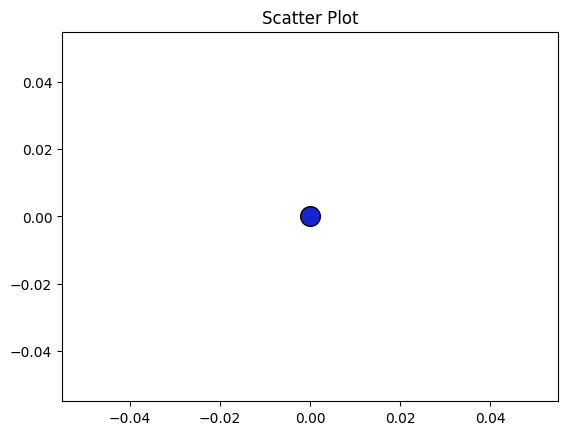

In [193]:
make_graph(K, cluster_index, centroids, combined_embeddings)